In [50]:
from linetools.spectra.xspectrum1d import XSpectrum1D
#from linetools.spectra.xspectrum1d import XSpectrum1D.fit_continuum
import numpy
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.io import fits
from glob import glob
from astropy import units as u
from linetools.lists.linelist import LineList
import warnings
warnings.filterwarnings('ignore')

def get_position(iden):
    #targ_ra_hr=name[48:50]
    targ_ra_hr=iden[54:56]
    targ_ra_min=iden[56:58]
    
    targ_dec_hr=iden[59:61]
    targ_dec_min=iden[61:63]
    
    if iden[58]!='+':
        print('hello')
        targ_DEC='-'+targ_dec_hr+':'+targ_dec_min
    if iden[58]=='+':
        targ_DEC=targ_dec_hr+':'+targ_dec_min+':'
    
    targ_RA=targ_ra_hr+':'+targ_ra_min
    return targ_RA,targ_DEC

hello
('00:13', '-00:24')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


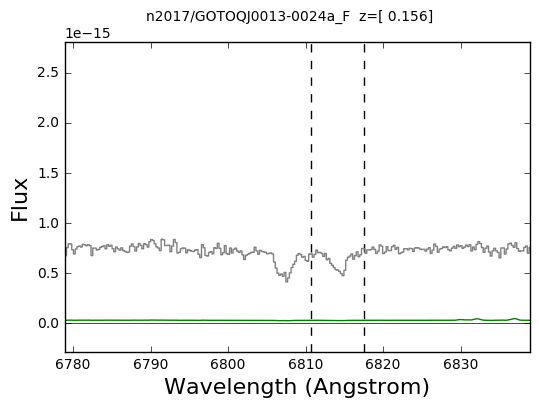

('11:35', '24:14:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


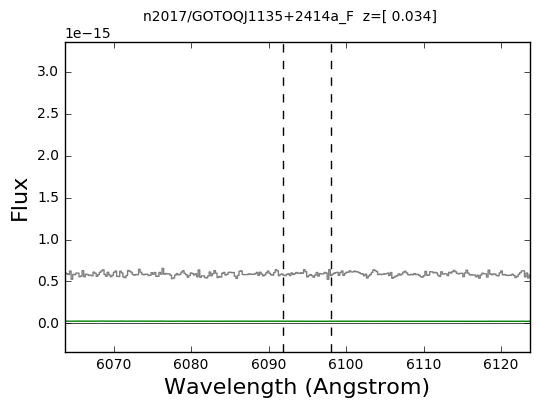

('12:20', '28:37:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


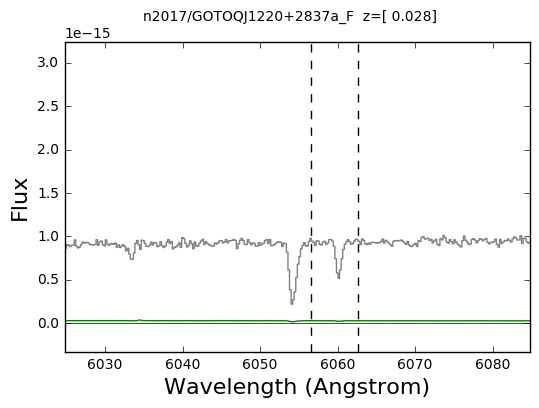

('12:41', '63:32:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


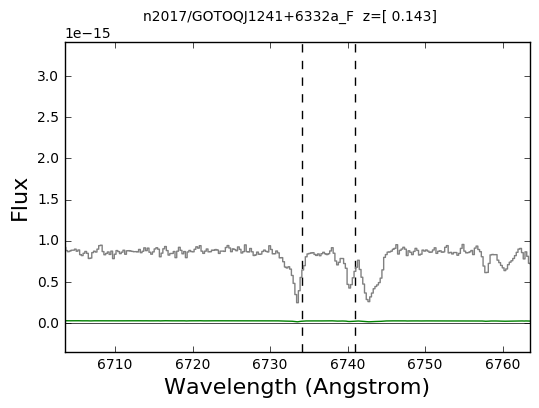

('12:48', '40:35:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


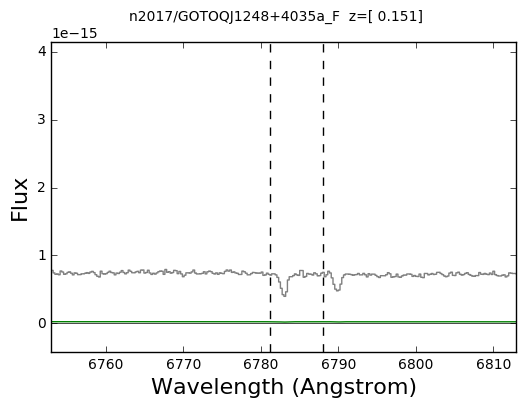

('13:28', '21:59:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


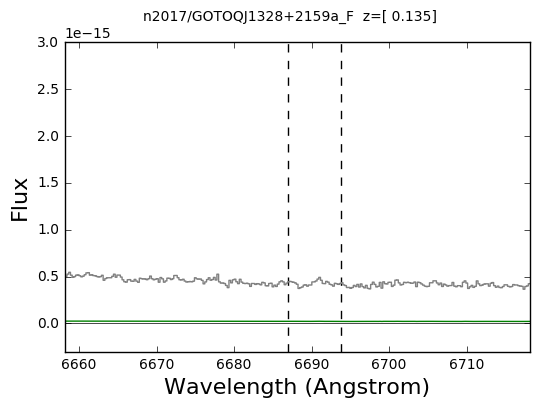

('14:29', '01:20:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


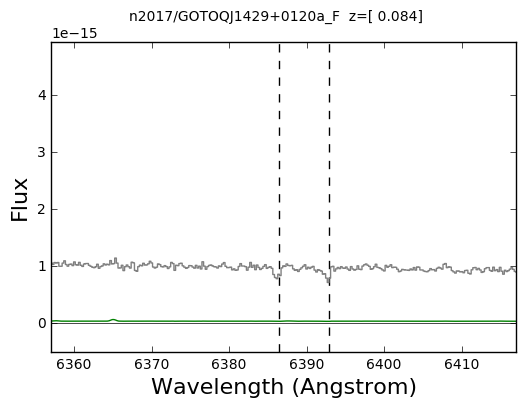

('14:57', '53:21:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


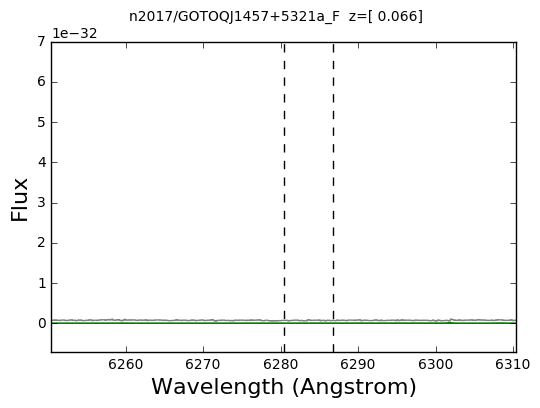

('14:59', '37:13:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


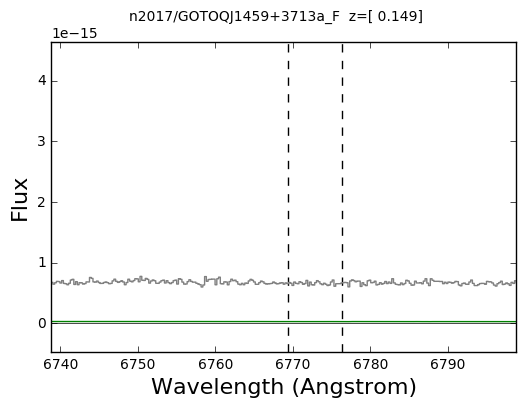

('15:25', '02:02:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


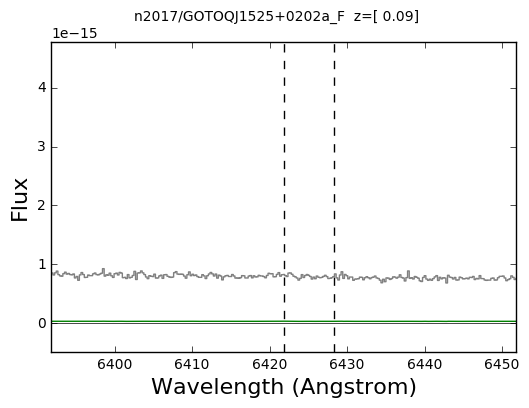

('16:05', '51:07:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


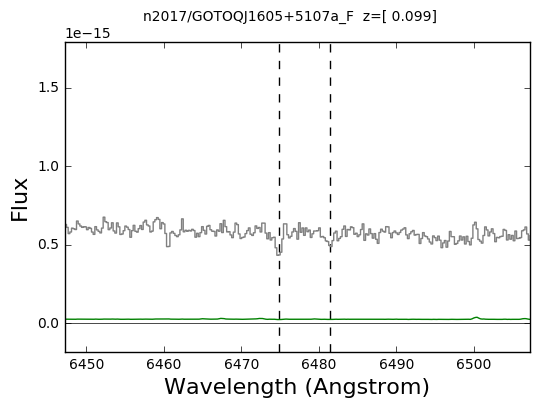

('16:56', '25:41:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


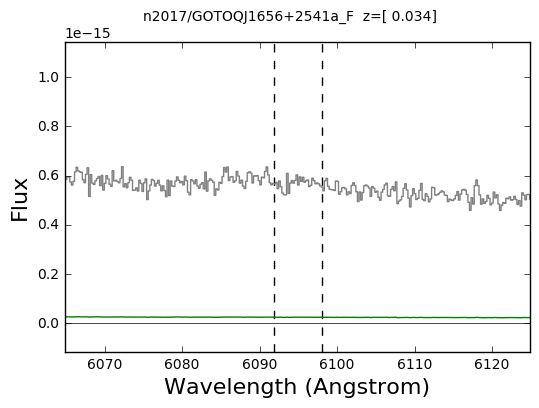

('16:59', '62:02:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


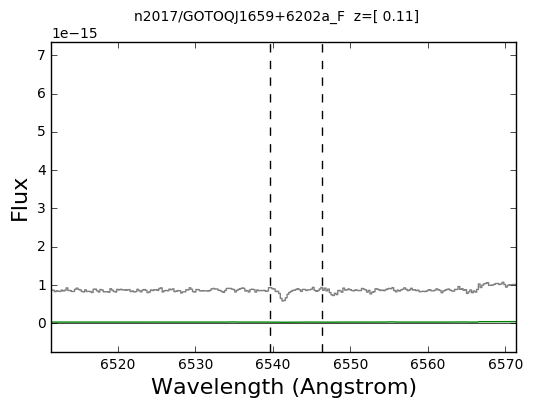

('17:17', '32:03:')
['-00:24' '13:56:' '-01:13' '00:38:' '00:01:' '00:14:' '34:07:' '14:35:'
 '06:41:' '07:19:' '14:14:' '23:25:' '-00:43' '12:05:' '54:42:' '53:02:'
 '-01:00' '06:19:' '-00:09' '07:48:' '05:18:' '29:48:' '06:07:' '02:17:'
 '60:26:' '20:21:' '24:14:' '19:21:' '39:07:' '60:40:' '14:18:' '28:37:'
 '16:55:' '10:56:' '64:48:' '63:32:' '40:35:' '52:32:' '28:11:' '20:36:'
 '52:25:' '21:59:' '56:10:' '15:25:' '06:29:' '45:50:' '41:41:' '45:35:'
 '01:20:' '50:41:' '53:21:' '37:13:' '57:10:' '08:25:' '02:57:' '02:02:'
 '51:07:' '21:24:' '45:45:' '11:27:' '22:41:' '41:46:' '25:41:' '22:11:'
 '33:26:' '62:02:' '32:03:' '00:26:' '00:44:']


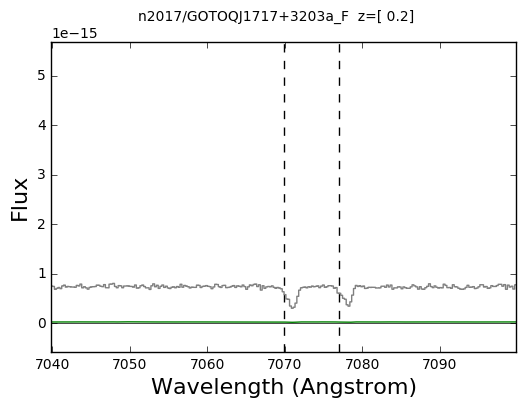

In [53]:
# Now let's plot all the spectra and save each figure
fname=glob('/Users/ryan/Desktop/keck_spectra/GOTOQs_Jun2017/G*F.fits')
for name in fname:
    sp=XSpectrum1D.from_file(name)
    targ_coord=get_position(name)
    print(targ_coord)
    
    
    dtype=[('RA','U5'),('DEC','U6'),('z',float),('b',float),('logM',float),('QSO_mag',float),('Sod_line',float)]
    prop=numpy.genfromtxt('/Users/ryan/Desktop/keck_spectra/target_list_Jun.dat',usecols = (0,1,3,4,5,6,7),dtype=dtype)
    print(prop['DEC'])
    # Match the target with its properties by using RA and DEC cooords
    w = numpy.logical_and(targ_coord[0]==prop['RA'] , targ_coord[1]==prop['DEC'] )
    data=prop[w]
    
    
    # Get the expected sodium transition wavelengths from the target properties
    line=data['Sod_line']
    
    #Define the wavelength range to search for redshifted Sodium lines
    wvlim=[line-30.0,line+30.0]*u.AA 
    
    strong=LineList('Strong') #Search for lines 
    transitions= strong.available_transitions(wvlim /(1+data['z']), n_max_tuple=None, min_strength=0.0)
    
    # Transform lines to the redshifted wavelength
    line1=transitions['wrest'][0]*(1+data['z'])
    line2=transitions['wrest'][1]*(1+data['z'])
    
    # plot the figure
    fig=plt.figure()
    fig.suptitle(name[42:-5]+'  z='+str(data['z']))
    plt.axvline(x=line1,color='k', linestyle='--')
    plt.axvline(x=line2,color='k', linestyle='--')
    sp.plot(xlim=(line-30,line+30))
    fig.savefig(name+'.pdf') # Save a copy of the figure
    
    

In [43]:
fname[0][56:58]



'13'

##### targ_coord=get_position(name)
targ_coord

In [ ]:
c = SkyCoord(targ_coord[0]+':00', '+64:48', unit=(u.hourangle, u.deg))

In [ ]:
c

In [ ]:
h=
targ_ra_hr=name[50:52]
targ_ra_min=name[52:54]
targ_dec_hr=name[53:55]
targ_dec_min=name[55:57]
targ_RA=targ_ra_hr+':'+targ_ra_min
targ_DEC=targ_dec_hr+':'+targ_dec_min
targ_RA